In [1]:
from importlib import reload

In [9]:
import utils_v2
reload(utils_v2)
from utils_v2 import *

import MintDQNAgent
reload(MintDQNAgent)
from MintDQNAgent import MintDQNAgent

In [5]:
import datetime

In [207]:
agent = MintDQNAgent(cash_supply=5000, epsilon_decay=0.9)

In [5]:
# features
agent.external_states

['USDT_BTC_high',
 'USDT_BTC_low',
 'USDT_BTC_close',
 'USDT_BTC_open',
 'USDT_BTC_weighted_mean',
 'USDT_BTC_volatility',
 'USDT_BTC_pctChange',
 'USDT_BTC_open_label',
 'USDT_BTC_pctChange_label',
 'USDT_BTC_volatility_label']

In [199]:
import matplotlib.pyplot as plt

def plot_test(start_time, end_time):

    if end_time is None: # default: one day
        end_time = start_time + agent.env.time_delta * 24

    df = agent.env.df
    df = df.loc[df.index >= start_time]
    df = df.loc[df.index <= end_time]
    prices = df['USDT_BTC_open']

    actions = agent.test_actions
    actions = actions[actions.index >= start_time]
    actions = actions[actions.index < end_time]

    fig, ax1 = plt.subplots(figsize = (15, 8))

    ax1.plot(prices.index, prices, 'b-')
    ax1.set_ylabel('Price', color='b', fontsize=15)
    ax1.tick_params('y', colors='b', labelsize=15)

    hold = actions[actions == 1]
    buy = actions[actions == 2]
    sell = actions[actions == 0]

    ax2 = ax1.twinx()
    ax2.scatter(hold.index, hold, c='blue', label='HOLD')
    ax2.scatter(buy.index, buy, c='green', label='BUY')
    ax2.scatter(sell.index, sell, c='red', label='SELL')
    ax2.set_yticks([])
    ax2.legend(loc=1, fontsize=15)

    plt.xlim(actions.index[0], actions.index[-1])       

    plt.show()

# Train (2017-12-01 ~ 2018-01-01)

In [208]:
train_start = datetime.datetime(2017,12,1,0)
train_end = datetime.datetime(2018,1,1,0)
agent.train(start_time = train_start, end_time = train_end, num_episodes=100, verbose=False) # SHOULD USE MORE EPOCHS!!!

Training from  2017-12-01 00:00:00  to 2018-01-01 00:00:00 :  ~ 31 days

episode: 1/100, returns: -5.6, epsilon: 1.0
episode: 2/100, returns: -4.5, epsilon: 1.0
episode: 3/100, returns: -4.8, epsilon: 1.0
1991
episode: 4/100, returns: -1.2e+01, epsilon: 0.9
2727
episode: 5/100, returns: -5.4, epsilon: 0.81
3463
episode: 6/100, returns: -1.3e+01, epsilon: 0.73
4199
episode: 7/100, returns: -9.7, epsilon: 0.66
4935
episode: 8/100, returns: -7.1, epsilon: 0.59
5671
episode: 9/100, returns: -1.3e+01, epsilon: 0.53
6407
episode: 10/100, returns: -1.4e+01, epsilon: 0.48
7143
episode: 11/100, returns: -8.2, epsilon: 0.43
7879
episode: 12/100, returns: -1.4e+01, epsilon: 0.39
8615
episode: 13/100, returns: -1.2e+01, epsilon: 0.35
9351
episode: 14/100, returns: -4.1, epsilon: 0.31
10087
episode: 15/100, returns: -7.2, epsilon: 0.28
10823
episode: 16/100, returns: -6.3, epsilon: 0.25
11559
episode: 17/100, returns: -6.3, epsilon: 0.23
12295
episode: 18/100, returns: -3.6, epsilon: 0.21
13031
epi

KeyboardInterrupt: 

# Sanity check

In [201]:
agent.env.set_current_time(datetime.datetime(2017,12,1,0))

In [209]:
agent.env.step()
state = agent.env.getStatesSequence() + agent.portfolio.getStates()
state -= agent.state_mean
print(state[:10])

agent.model.predict(state)

[-7.92211293e+02 -1.17129725e+03 -7.56052780e+02 -1.40255923e+03
 -8.31801906e+02  7.24947776e-04  3.85046523e-02 -1.03193961e+00
  9.62325784e-01  2.68510453e-01]


array([[664.6099 , 637.7319 , 421.61682]], dtype=float32)

# Test on (2017-09-01 ~ 2018,1,1,0) Cheating...

In [212]:
test_start = datetime.datetime(2017,12,1,0)
test_end = datetime.datetime(2018,1,1,0)
agent.test(start_time = test_start, end_time = test_end, verbose=True)

Testing from  2017-12-01 00:00:00  to 2018-01-01 00:00:00 :  ~ 31 days

Current time: 2017-12-01 00:00:00
Action start: Action.SELL , Total value before action: 5000.0
Before selling: coin:0.000, cash:5000.000, sell price:9763.156
After selling: coin sold:0.000, transaction fees:0.000, coin now:0.000, cash now:5000.000
Action end:  Action.HOLD , Total value now: 5000.000.  , Return since entry: 0.000 %

Current time: 2017-12-02 00:00:00
Action start: Action.SELL , Total value before action: 5000.0
Before selling: coin:0.000, cash:5000.000, sell price:10805.239
After selling: coin sold:0.000, transaction fees:0.000, coin now:0.000, cash now:5000.000
Action end:  Action.HOLD , Total value now: 5000.000.  , Return since entry: 0.000 %

Current time: 2017-12-03 00:00:00
Action start: Action.SELL , Total value before action: 5000.0
Before selling: coin:0.000, cash:5000.000, sell price:10777.120
After selling: coin sold:0.000, transaction fees:0.000, coin now:0.000, cash now:5000.000
Action 

Current time: 2017-12-28 00:00:00
Action start: Action.SELL , Total value before action: 4913.986615080409
Before selling: coin:0.024, cash:4551.437, sell price:15070.840
After selling: coin sold:0.002, transaction fees:0.091, coin now:0.022, cash now:4587.601
Action end:  Action.SELL , Total value now: 4913.896.  , Return since entry: -1.722 %

Current time: 2017-12-29 00:00:00
Action start: Action.SELL , Total value before action: 4839.362821111301
Before selling: coin:0.016, cash:4612.721, sell price:14139.195
After selling: coin sold:0.002, transaction fees:0.057, coin now:0.014, cash now:4635.328
Action end:  Action.SELL , Total value now: 4839.306.  , Return since entry: -3.214 %

Current time: 2017-12-30 00:00:00
Action start: Action.SELL , Total value before action: 4839.654655915612
Before selling: coin:0.005, cash:4768.462, sell price:14153.100
After selling: coin sold:0.001, transaction fees:0.018, coin now:0.005, cash now:4775.563
Action end:  Action.SELL , Total value now:

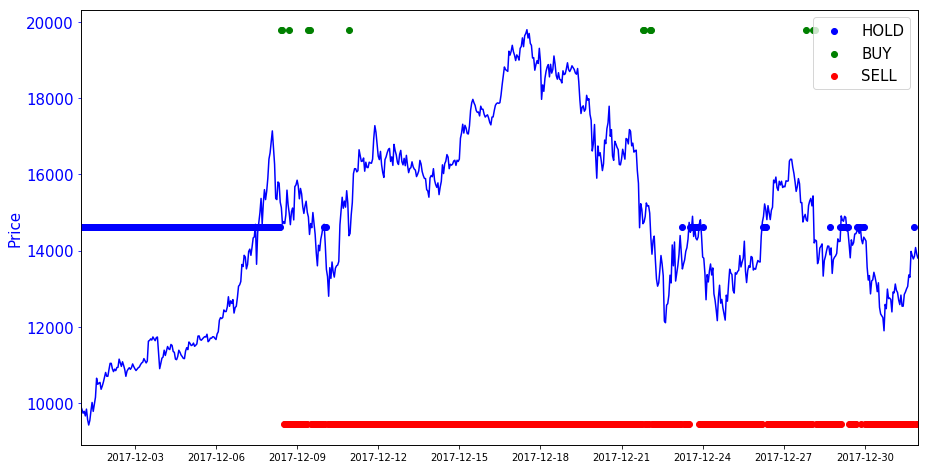

In [213]:
plot_test(test_start, test_end)

# Test on unseen time period (2018-01-01 ~ )

In [214]:
test_start = datetime.datetime(2018,1,1,0)
agent.test(start_time = test_start, verbose=True)

Testing from  2018-01-01 00:00:00  to 2018-04-14 02:00:00 :  ~ 103 days

Current time: 2018-01-01 00:00:00
Action start: Action.SELL , Total value before action: 5000.0
Before selling: coin:0.000, cash:5000.000, sell price:13471.765
After selling: coin sold:0.000, transaction fees:0.000, coin now:0.000, cash now:5000.000
Action end:  Action.HOLD , Total value now: 5000.000.  , Return since entry: 0.000 %

Current time: 2018-01-02 00:00:00
Action start: Action.SELL , Total value before action: 5000.0
Before selling: coin:0.000, cash:5000.000, sell price:13717.085
After selling: coin sold:0.000, transaction fees:0.000, coin now:0.000, cash now:5000.000
Action end:  Action.HOLD , Total value now: 5000.000.  , Return since entry: 0.000 %

Current time: 2018-01-03 00:00:00
Action start: Action.SELL , Total value before action: 5000.0
Before selling: coin:0.000, cash:5000.000, sell price:14664.079
After selling: coin sold:0.000, transaction fees:0.000, coin now:0.000, cash now:5000.000
Actio

Current time: 2018-01-25 00:00:00
Action start: Action.SELL , Total value before action: 4933.122695731482
Before selling: coin:0.000, cash:4933.123, sell price:11220.821
After selling: coin sold:0.000, transaction fees:0.000, coin now:0.000, cash now:4933.123
Action end:  Action.SELL , Total value now: 4933.123.  , Return since entry: -1.338 %

Current time: 2018-01-26 00:00:00
Action start: Action.SELL , Total value before action: 4933.122695731481
Before selling: coin:0.000, cash:4933.123, sell price:11321.586
After selling: coin sold:0.000, transaction fees:0.000, coin now:0.000, cash now:4933.123
Action end:  Action.SELL , Total value now: 4933.123.  , Return since entry: -1.338 %

Current time: 2018-01-27 00:00:00
Action start: Action.SELL , Total value before action: 4933.122695731481
Before selling: coin:0.000, cash:4933.123, sell price:11016.664
After selling: coin sold:0.000, transaction fees:0.000, coin now:0.000, cash now:4933.123
Action end:  Action.SELL , Total value now:

Current time: 2018-02-18 00:00:00
Action start: Action.SELL , Total value before action: 4933.122695731481
Before selling: coin:0.000, cash:4933.123, sell price:10989.758
After selling: coin sold:0.000, transaction fees:0.000, coin now:0.000, cash now:4933.123
Action end:  Action.SELL , Total value now: 4933.123.  , Return since entry: -1.338 %

Current time: 2018-02-19 00:00:00
Action start: Action.SELL , Total value before action: 4933.122695731481
Before selling: coin:0.000, cash:4933.123, sell price:10367.723
After selling: coin sold:0.000, transaction fees:0.000, coin now:0.000, cash now:4933.123
Action end:  Action.SELL , Total value now: 4933.123.  , Return since entry: -1.338 %

Current time: 2018-02-20 00:00:00
Action start: Action.SELL , Total value before action: 4933.122695731481
Before selling: coin:0.000, cash:4933.123, sell price:11347.310
After selling: coin sold:0.000, transaction fees:0.000, coin now:0.000, cash now:4933.123
Action end:  Action.SELL , Total value now:

Current time: 2018-03-14 00:00:00
Action start: Action.SELL , Total value before action: 4933.122695731481
Before selling: coin:0.000, cash:4933.123, sell price:9244.246
After selling: coin sold:0.000, transaction fees:0.000, coin now:0.000, cash now:4933.123
Action end:  Action.SELL , Total value now: 4933.123.  , Return since entry: -1.338 %

Current time: 2018-03-15 00:00:00
Action start: Action.SELL , Total value before action: 4933.122695731481
Before selling: coin:0.000, cash:4933.123, sell price:8025.012
After selling: coin sold:0.000, transaction fees:0.000, coin now:0.000, cash now:4933.123
Action end:  Action.SELL , Total value now: 4933.123.  , Return since entry: -1.338 %

Current time: 2018-03-16 00:00:00
Action start: Action.SELL , Total value before action: 4933.122695731481
Before selling: coin:0.000, cash:4933.123, sell price:7997.130
After selling: coin sold:0.000, transaction fees:0.000, coin now:0.000, cash now:4933.123
Action end:  Action.SELL , Total value now: 49

Current time: 2018-04-07 00:00:00
Action start: Action.SELL , Total value before action: 4933.122695731481
Before selling: coin:0.000, cash:4933.123, sell price:6576.970
After selling: coin sold:0.000, transaction fees:0.000, coin now:0.000, cash now:4933.123
Action end:  Action.SELL , Total value now: 4933.123.  , Return since entry: -1.338 %

Current time: 2018-04-08 00:00:00
Action start: Action.SELL , Total value before action: 4933.122695731481
Before selling: coin:0.000, cash:4933.123, sell price:6900.493
After selling: coin sold:0.000, transaction fees:0.000, coin now:0.000, cash now:4933.123
Action end:  Action.SELL , Total value now: 4933.123.  , Return since entry: -1.338 %

Current time: 2018-04-09 00:00:00
Action start: Action.SELL , Total value before action: 4933.122695731481
Before selling: coin:0.000, cash:4933.123, sell price:7024.622
After selling: coin sold:0.000, transaction fees:0.000, coin now:0.000, cash now:4933.123
Action end:  Action.SELL , Total value now: 49

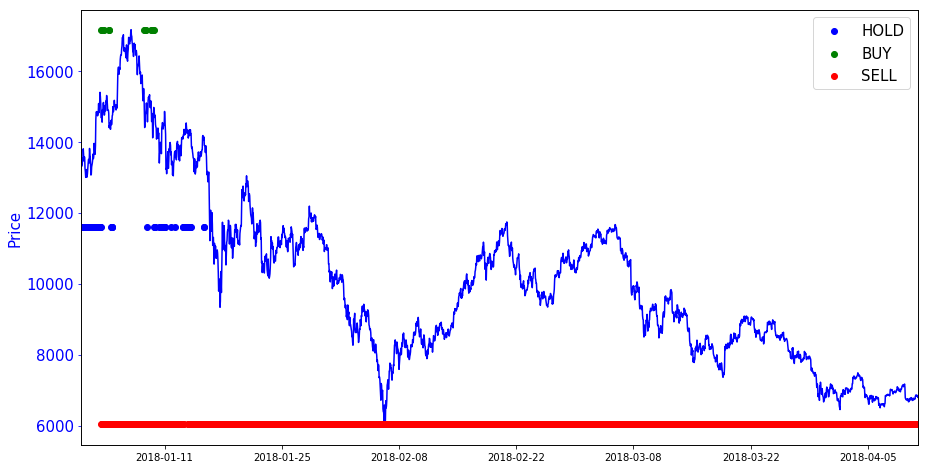

In [216]:
plot_test(test_start, datetime.datetime(2018,4,11,0))

# Save Model (Optional)

In [15]:
agent.model.load('BTC.model.h5')

# Always buy agent

In [204]:
from simple_agents import *

In [205]:
always_buy_agent = AlwaysBuyAgent(Action)

In [206]:
env = Environment()
now = datetime.datetime(2017,12,1,0)
test_end = datetime.datetime(2018,1,1,0)
env.set_current_time(now)
portfolio = Portfolio(cash_supply=1e8)
while True:
    action = always_buy_agent.get_action()
    if (env.current_index - env.start_index) / env.time_delta % 24 == 0:
        verbose = True
        print('Current time:', env.current_index)
    else:
        verbose = False
    current_price = env.getCurrentPrice()
    action = portfolio.apply_action(current_price, action, verbose=verbose)
    is_done, state = env.step()
    if env.current_index == test_end:
        break
print("Initial cash supply:", portfolio.starting_cash)
print("Final holdings:", portfolio.getCurrentHoldings(env.getCurrentPrice()))

Current time: 2017-12-01 13:00:00
Action start: Action.BUY , Total value before action: 101768167.32603675
Before buying: coin:7583.457, cash:25327021.511, buy price:10218.013
After buying: coin bought:247.866, transaction fees:6331.755, coin now:7831.323, cash now:22787987.604
Action end:  Action.BUY , Total value now: 101727623.464.  , Return since entry: 1.728 %

Current time: 2017-12-02 13:00:00
Action start: Action.BUY , Total value before action: 109454130.3945612
Before buying: coin:9763.814, cash:2006821.046, buy price:11155.333
After buying: coin bought:17.990, transaction fees:501.705, coin now:9781.804, cash now:1805637.237
Action end:  Action.BUY , Total value now: 109450917.846.  , Return since entry: 9.451 %

Current time: 2017-12-03 13:00:00
Action start: Action.BUY , Total value before action: 114972193.9853586
Before buying: coin:9931.208, cash:159013.199, buy price:11719.152
After buying: coin bought:1.357, transaction fees:39.753, coin now:9932.564, cash now:143072.1

Current time: 2017-12-30 13:00:00
Action start: Action.BUY , Total value before action: 123570645.59934495
Before buying: coin:9944.905, cash:0.000, buy price:12595.667
After buying: coin bought:0.000, transaction fees:0.000, coin now:9944.905, cash now:0.000
Action end:  Action.BUY , Total value now: 123570645.599.  , Return since entry: 23.571 %

Current time: 2017-12-31 13:00:00
Action start: Action.BUY , Total value before action: 128366983.95875396
Before buying: coin:9944.905, cash:0.000, buy price:13084.562
After buying: coin bought:0.000, transaction fees:0.000, coin now:9944.905, cash now:0.000
Action end:  Action.BUY , Total value now: 128366983.959.  , Return since entry: 28.367 %

Initial cash supply: 100000000.0
Final holdings: 9944.90 coins, 0.00 cash, 136306457.98 current value, 36.31 percent returns
